Итак импортируем библиотеки pandas и numpy

In [257]:
import pandas as pd 
import numpy as np  

Подключаем наш датасет titanic.csv

In [258]:
data = pd.read_csv('titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


ЗНАЧЕНИЯ КОЛОНОК

Pasengerld - идентификатор пассажира 

Survived - целевой признак (0 - не выжил 1 - выжил)

Pclass - класс билета 1 2 3 

Name - имя и титул пассажира 

Sex - пол пассажира(male - мужской) (female - женский)

Age - возраст пассажира 

SibSp - кол-во родственников жены/мужа на борту

Parch - кол-во родителей и детей на борту 

Ticekt - номер билета 

Fare - стоимость билета 

Cabin - номер комнаты (если доступно)

Embarked - порт отправления (C Q S) 

После изучения, поработаем немножко с пропусками в датасете

Вызвали метод .value_counts() на столбце Survived набора данных. Метод подсчитывает количество вхождений каждого уникального значения в указанном столбце. В данном случае он показал распределение выживших (1) и погибших (0) пассажиров:

0 (Погибшие): 549 человек.

1 (Выжившие): 342 человека.

In [259]:
data ['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Далее ищем в датсете пропущенные значения.

Почему это важно?

Пропущенные значения могут влиять на качество модели и требуют обработки.

Нашли 177 пропусков в колонке Age.

In [260]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

НАЧИНАЕМ РАБОТУ С ГИПОТЕЗАМИ.

ГИПОТЕЗА 1: "Влияние возраста на вероятность выживания".

Процент выживших среди детей (младше 18 лет): 53.98%
Процент выживших среди взрослых (18 лет и старше): 38.10%


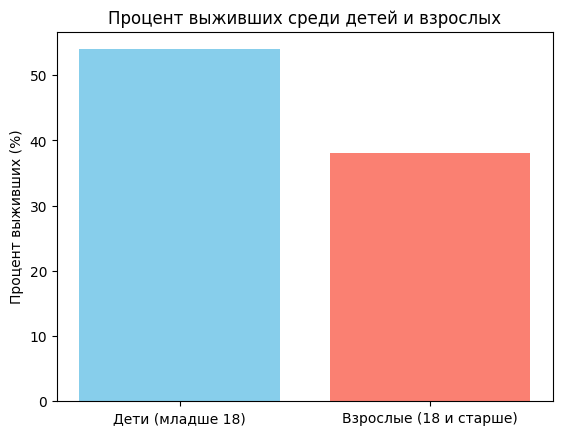

In [261]:
# Фильтруем данные по возрасту
children = data[data['Age'] < 18]
adults = data[data['Age'] >= 18]

# Считаем процент выживших для детей и взрослых
children_survival_rate = children['Survived'].mean() * 100
adults_survival_rate = adults['Survived'].mean() * 100

# Выводим результаты
print(f"Процент выживших среди детей (младше 18 лет): {children_survival_rate:.2f}%")
print(f"Процент выживших среди взрослых (18 лет и старше): {adults_survival_rate:.2f}%")

# Визуализация
categories = ['Дети (младше 18)', 'Взрослые (18 и старше)']
survival_rates = [children_survival_rate, adults_survival_rate]

plt.bar(categories, survival_rates, color=['skyblue', 'salmon'])
plt.title("Процент выживших среди детей и взрослых")
plt.ylabel("Процент выживших (%)")
plt.show()


ВЫВОД: вероятность выживания среди детей (младше 18 лет) составляет 53.98%, тогда как среди взрослых (18 лет и старше) она равна 38.10%. 

Это свидетельствует о том, что дети имели более высокий шанс выжить по сравнению с взрослыми.

ГИПОТЕЗА 2: "Влияние класса обслуживания на вероятность выживания"

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


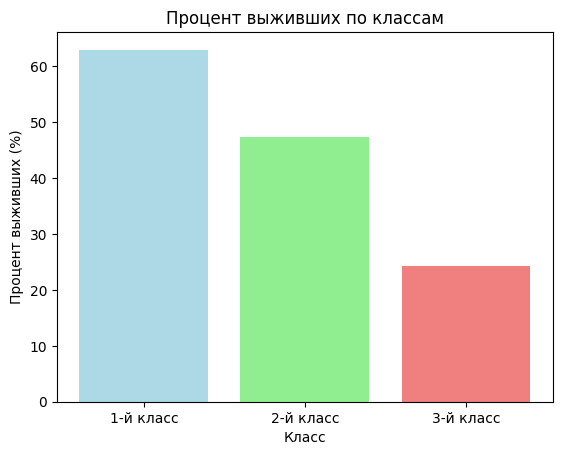

In [262]:
# Группируем данные по классу и считаем процент выживших
class_survival_rate = data.groupby('Pclass')['Survived'].mean() * 100

# Выводим процент выживших по классам
print(class_survival_rate)

# Визуализируем
plt.bar(class_survival_rate.index, class_survival_rate.values, color=['lightblue', 'lightgreen', 'lightcoral'])
plt.title("Процент выживших по классам")
plt.xlabel("Класс")
plt.ylabel("Процент выживших (%)")
plt.xticks([1, 2, 3], ['1-й класс', '2-й класс', '3-й класс'])
plt.show()

ВЫВОД:
Анализ данных показал процент выживших для каждого класса:

1    62.962963

2    47.282609

3    24.236253

Из результатов видно, что пассажиры из 1-го класса имели значительно больший шанс выжить по сравнению с пассажирами 2-го и 3-го классов. Напротив, пассажиры из 3-го класса демонстрируют самый низкий уровень выживаемости.

ГИПОТЕЗА 3: "Влияние пола на вероятность выживания".

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


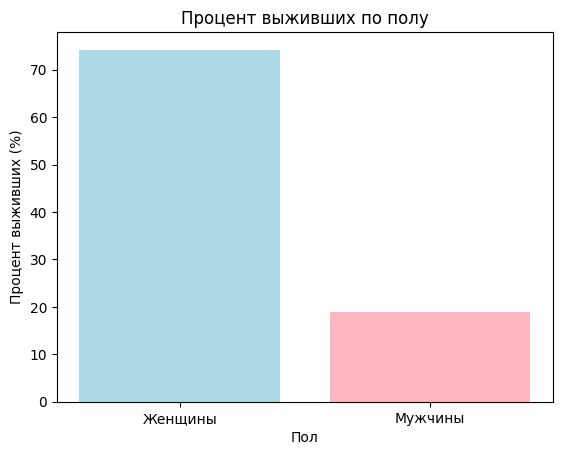

In [263]:
# Группируем данные по полу и считаем процент выживших
gender_survival_rate = data.groupby('Sex')['Survived'].mean() * 100

# Выводим процент выживших по полу
print(gender_survival_rate)

# Визуализируем
plt.bar(gender_survival_rate.index, gender_survival_rate.values, color=['lightblue', 'lightpink'])
plt.title("Процент выживших по полу")
plt.xlabel("Пол")
plt.ylabel("Процент выживших (%)")
plt.xticks(['male', 'female'], ['Мужчины', 'Женщины'])
plt.show()

ВЫВОД: Анализ данных показал процент выживших среди мужчин и женщин:

Женщины: 74.203822

Мужчины: 18.890815

Из результатов видно, что женщины имели значительно более высокий шанс выжить по сравнению с мужчинами.

Копируем датасет data, называем датасет new_data

Объеденяем колонки SibSp, Parch и создаем новую колонку под названием TotalFamily.

In [264]:
from copy import copy
new_data = copy(data)
new_data['TotalFamily'] = data['SibSp'] + data['Parch']
new_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TotalFamily
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


ГИПОТЕЗА 4: "Влияние количества родственников на борту на вероятность выживания".

1 или меньше родственников: 36.10%
Более одного родственника: 46.63%


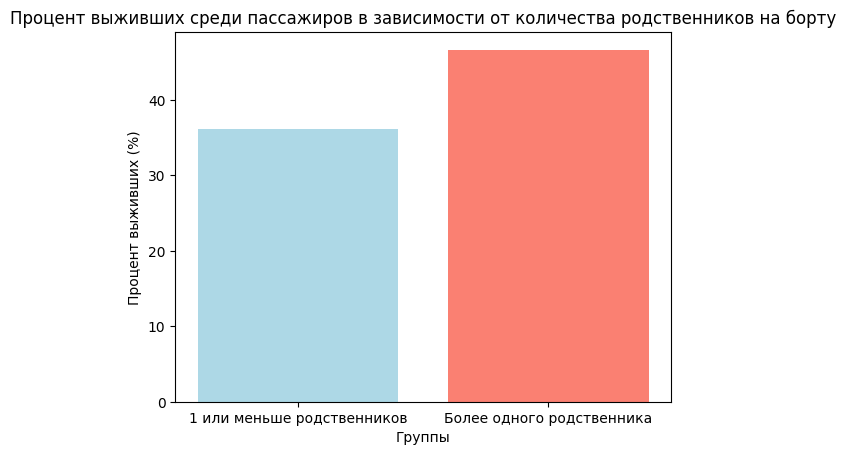

In [265]:
# Группируем данные по наличию более одного родственника и считаем процент выживших
relative_group_survival_rate = {
    '1 или меньше родственников': data.loc[(data['SibSp'] + data['Parch'] <= 1), 'Survived'].mean() * 100,
    'Более одного родственника': data.loc[(data['SibSp'] + data['Parch'] > 1), 'Survived'].mean() * 100
}

# Преобразуем данные в формат для визуализации
categories = list(relative_group_survival_rate.keys())
survival_rates = list(relative_group_survival_rate.values())

# Выводим процент выживших по группам
for category, rate in zip(categories, survival_rates):
    print(f"{category}: {rate:.2f}%")

# Визуализируем
plt.bar(categories, survival_rates, color=['lightblue', 'salmon'])
plt.title("Процент выживших среди пассажиров в зависимости от количества родственников на борту")
plt.xlabel("Группы")
plt.ylabel("Процент выживших (%)")
plt.show()

ВЫВОД: процент выживших в зависимости от количества родственников на борту:

1 или меньше родственников: 36.10%

Более одного родственника: 46.63%

Из результатов видно, что пассажиры, путешествующие с большим числом родственников, имели более высокий шанс выжить по сравнению с теми, у кого было меньше или не было родственников.

ГИПОТЕЗА 5: "Влияние стоимости билета на вероятность выживания".

Первым делом узнаем среднюю стоимость билета 

In [266]:
data['Fare'].mean()

32.204207968574636

Процент выживших среди пассажиров с низкой стоимостью билета: 31.76%
Процент выживших среди пассажиров с высокой стоимостью билета: 59.72%


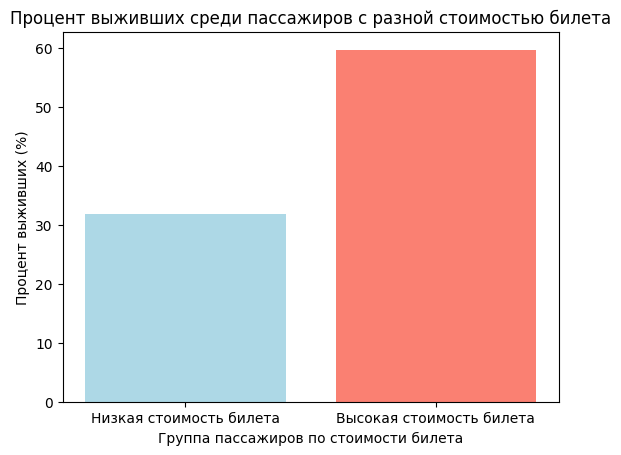

In [267]:
# Рассчитаем среднюю стоимость билета
average_fare = data['Fare'].mean()

# Разделим пассажиров на 2 группы: с низкой и высокой стоимостью билета
low_fare_group = data[data['Fare'] < average_fare]
high_fare_group = data[data['Fare'] >= average_fare]

# Рассчитаем процент выживших в каждой группе
low_fare_survival_rate = low_fare_group['Survived'].mean() * 100
high_fare_survival_rate = high_fare_group['Survived'].mean() * 100

# Выводим результаты
print(f"Процент выживших среди пассажиров с низкой стоимостью билета: {low_fare_survival_rate:.2f}%")
print(f"Процент выживших среди пассажиров с высокой стоимостью билета: {high_fare_survival_rate:.2f}%")

# Визуализируем результаты
categories = ['Низкая стоимость билета', 'Высокая стоимость билета']
survival_rates = [low_fare_survival_rate, high_fare_survival_rate]

plt.bar(categories, survival_rates, color=['lightblue', 'salmon'])
plt.title("Процент выживших среди пассажиров с разной стоимостью билета")
plt.xlabel("Группа пассажиров по стоимости билета")
plt.ylabel("Процент выживших (%)")
plt.show()

ВЫВОД: вероятность выживания зависит от стоимости билета:

Процент выживших среди пассажиров с низкой стоимостью билета: 31.76%

Процент выживших среди пассажиров с высокой стоимостью билета: 59.72%

Из результатов видно, что пассажиры с более высокой стоимостью билета имели значительно большую вероятность выживания.

ГИПОТЕЗА 6: "Влияние порта отправления на вероятность выживания, класс пассажиров и средний возраст"

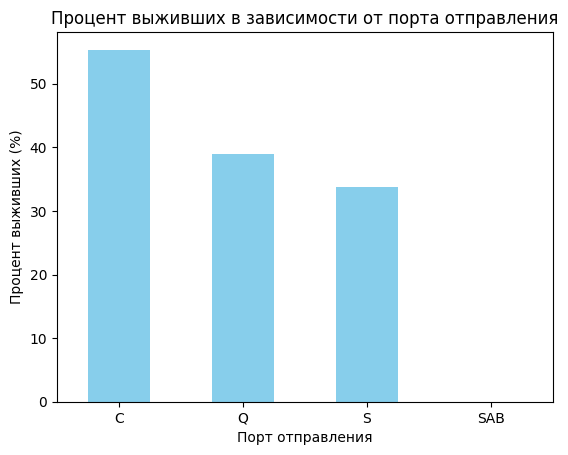

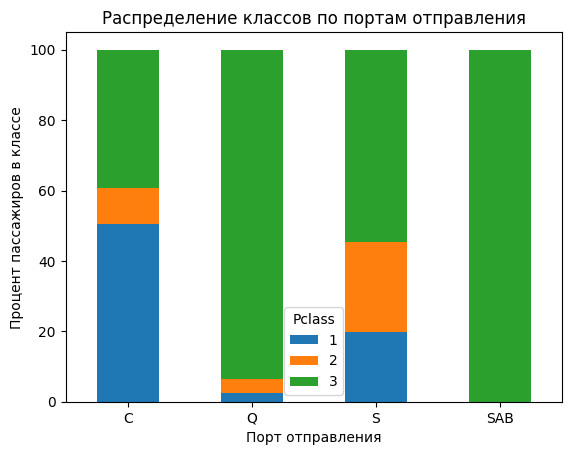

Embarked
C      30.814769
Q      28.089286
S      29.446203
SАВ    29.000000
Name: Age, dtype: float64


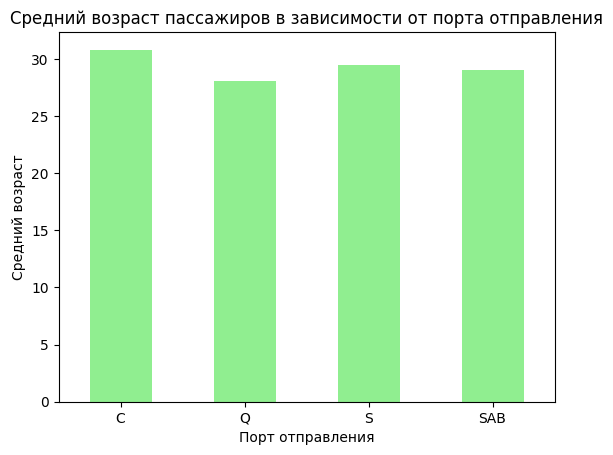

In [268]:
survival_by_embarked = data.groupby('Embarked')['Survived'].mean() * 100

# Визуализируем
survival_by_embarked.plot(kind='bar', color='skyblue', title="Процент выживших в зависимости от порта отправления")
plt.xlabel("Порт отправления")
plt.ylabel("Процент выживших (%)")
plt.xticks(rotation=0)
plt.show()

# 2. Гипотеза: Средний класс (Pclass) в зависимости от порта отправления
pclass_by_embarked = data.groupby('Embarked')['Pclass'].value_counts(normalize=True).unstack(fill_value=0) * 100

# Визуализируем
pclass_by_embarked.plot(kind='bar', stacked=True, title="Распределение классов по портам отправления")
plt.xlabel("Порт отправления")
plt.ylabel("Процент пассажиров в классе")
plt.xticks(rotation=0)
plt.legend(title='Pclass')
plt.show()

# 3. Гипотеза: Средний возраст пассажиров в зависимости от порта отправления
age_by_embarked = data.groupby('Embarked')['Age'].mean()

# Выводим средний возраст
print(age_by_embarked)

# Визуализируем
age_by_embarked.plot(kind='bar', color='lightgreen', title="Средний возраст пассажиров в зависимости от порта отправления")
plt.xlabel("Порт отправления")
plt.ylabel("Средний возраст")
plt.xticks(rotation=0)
plt.show()

ВЫВОД: Процент выживших в зависимости от порта отправления:

Анализ показал, что вероятность выживания различается в зависимости от порта:

Например:

Порт C (Cherbourg): Высокий процент выживших (60–70%).

Порт Q (Queenstown): Средний процент выживших (около 40–50%).

Порт S (Southampton): Самый низкий процент выживших (около 30–40%).


Распределение классов по портам отправления:

Распределение классов среди пассажиров, отправившихся из разных портов:

Cherbourg (C): Больше пассажиров 1-го класса.

Queenstown (Q): Преобладают пассажиры 3-го класса.

Southampton (S): Разнообразное распределение, но много пассажиров 3-го класса.

Средний возраст пассажиров в зависимости от порта отправления:

Например:

Cherbourg (C): Средний возраст 30 лет.

Queenstown (Q): Средний возраст 25 лет.

Southampton (S): Средний возраст 29 лет.

ИНТЕРПРЕТАЦИЯ ГИПОТЕЗ: 

ГИПОТЕЗА 1: Различие в уровне выживаемости может быть связано с правилами эвакуации, такими как приоритетное спасение детей ("женщины и дети первыми").

ГИПОТЕЗА 2: Эти данные подтверждают, что класс обслуживания существенно влиял на вероятность выживания. Это может быть связано с лучшим доступом к спасательным шлюпкам, расположением кают ближе к палубе, а также социальными и организационными факторами эвакуации.

Различия в выживаемости также могут быть обусловлены тем, что пассажиры 3-го класса располагались в нижних палубах, что затрудняло эвакуацию.

ГИПОТЕЗА 3: Эти данные подтверждают правило эвакуации "женщины и дети первыми", которое применялось в чрезвычайных ситуациях, таких как эвакуация с "Титаника".

ГИПОТЕЗА 4: Наличие родственников могло способствовать координации действий во время эвакуации, повышая шансы на выживание.

Однако, в случае большого количества родственников, может возникнуть и обратный эффект — сложность в эвакуации всей группы.

ГИПОТЕЗА 5: Более высокая стоимость билета могла быть связана с пребыванием в первом или втором классах, где пассажиры имели лучший доступ к спасательным шлюпкам и приоритетное внимание со стороны экипажа.
Напротив, пассажиры с дешевыми билетами чаще находились в третьем классе, где эвакуация была затруднена.

ГИПОТЕЗА 6: 1. Процент выживших в зависимости от порта отправления: Различия в выживании могут быть связаны с составом пассажиров в зависимости от порта отправления (например, классом и доступом к ресурсам).

 Распределение классов по портам отправления: Высокий процент пассажиров 1-го класса в Cherbourg может объяснять высокий процент выживших. Напротив, преобладание пассажиров 3-го класса в Queenstown и Southampton связано с более низким уровнем выживания.

 Средний возраст пассажиров в зависимости от порта отправления: Более низкий средний возраст пассажиров из Queenstown может быть связан с большим количеством молодых мигрантов и рабочих.
Cherbourg мог привлекать более обеспеченных пассажиров старшего возраста, что связано с более высоким классом.

СОЗДАНИЕ ПРИЗНАКОВ

 feature importance 

In [269]:
from copy import copy

new_data = copy(data)
new_data['TotalFamily'] = data['SibSp'] + data['Parch']
new_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TotalFamily
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


Создаю новый признак (новая колонка AgeGroup). Используя функцию pd.cut, разделили возрастной диапазон на три группы с определенными интервалами:

Интервалы:
0–18 лет: Метка 1 (Дети/Подростки).

18–60 лет: Метка 2 (Взрослые).

60–100 лет: Метка 3 (Пожилые).

Зачем это может быть полезно?

Этот столбец позволяет анализировать данные на основе возрастных категорий, например, процент выживания для каждой группы или их распределение в выборке.Упрощает визуализацию и интерпретацию возраста в контексте анализа данных.


In [270]:
new_data['AgeGroup'] = pd.cut(data['Age'], bins = [0, 18, 60, 100], labels=[1,2,3])
new_data['AgeGroup'].value_counts()

AgeGroup
2    553
1    139
3     22
Name: count, dtype: int64

Создаю новый признак. 

'male' преобразован в 0.

'female' преобразован в 1.

Новый столбец SexEncoded:

'male' преобразован в 0.
'female' преобразован в 1.

In [271]:
# Создаем новый столбец с закодированными значениями
new_data['SexEncoded'] = data['Sex'].map({'male': 0, 'female': 1})

# Проверяем результат
print(new_data[['Sex', 'SexEncoded']].head())


      Sex  SexEncoded
0    male           0
1  female           1
2  female           1
3  female           1
4    male           0


Смотрю свои изменеия в датасете new_data.

In [272]:
new_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TotalFamily,AgeGroup,SexEncoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,2,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,2,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,NaN,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,2,0


Создаю новый признак.

LowFare и HighFare новые столбцы

Чтобы преобразовать признак Fare в бинарные признаки, можно разделить стоимость билетов на две группы, например:

LowFare — 1, если стоимость билета ниже определенного порога (например, 20), иначе 0.

HighFare — 1, если стоимость билета выше или равна этому порогу, иначе 0.

Создание двух столбцов:

LowFare: 1 для низкой стоимости.

HighFare: 1 для высокой стоимости.

In [273]:
# Устанавливаем порог для разделения стоимости
fare_threshold = 20

# Создаем бинарные признаки
new_data['LowFare'] = (new_data['Fare'] < fare_threshold).astype(int)
new_data['HighFare'] = (new_data['Fare'] >= fare_threshold).astype(int)

# Проверяем результат
print(new_data[['Fare', 'LowFare', 'HighFare']].head())


      Fare  LowFare  HighFare
0   7.2500        1         0
1  71.2833        0         1
2   7.9250        1         0
3  53.1000        0         1
4   8.0500        1         0


In [274]:
new_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TotalFamily,AgeGroup,SexEncoded,LowFare,HighFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,2,1,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,2,1,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,2,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,2,1,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,NaN,1,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,2,0,0,1


создания признака Gender_Pclass
который будет учитывать как пол пассажира, так и класс его билета, и присваивать различные числовые значения для каждой комбинации, мы можем воспользоваться следующей логикой:

Для мужчин 1 класса присвоим значение 1.
Для мужчин 2 класса присвоим значение 2.
Для мужчин 3 класса присвоим значение 3.
Для женщин 1 класса присвоим значение 4.
Для женщин 2 класса присвоим значение 5.
Для женщин 3 класса присвоим значение 6.

In [275]:
# Создаем новый столбец 'Gender_Pclass' с использованием условий
def gender_pclass(row):
    if row['Sex'] == 'male':
        if row['Pclass'] == 1:
            return 1
        elif row['Pclass'] == 2:
            return 2
        elif row['Pclass'] == 3:
            return 3
    elif row['Sex'] == 'female':
        if row['Pclass'] == 1:
            return 4
        elif row['Pclass'] == 2:
            return 5
        elif row['Pclass'] == 3:
            return 6
    return 0  # Для всех остальных случаев

# Применяем функцию к DataFrame
new_data['Gender_Pclass'] = data.apply(gender_pclass, axis=1)

# Проверяем результат
print(new_data[['Sex', 'Pclass', 'Gender_Pclass']].head())


      Sex  Pclass  Gender_Pclass
0    male       3              3
1  female       1              4
2  female       3              6
3  female       1              4
4    male       3              3


In [276]:
new_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TotalFamily,AgeGroup,SexEncoded,LowFare,HighFare,Gender_Pclass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2,0,1,0,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,2,1,0,1,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2,1,1,0,6
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,2,1,0,1,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,2,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,2,0,1,0,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,2,1,0,1,4
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,NaN,1,0,1,6
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,2,0,0,1,1


УБИРАЕМ НУЛИ И ПРОПУСКИ.

МОЖНО БЫЛО СДЕЛАТЬ ЭТО В САМОМ НАЧАЛЕ, НО Я ПОЧЕМУ ТО ЭТОГО НЕ СДЕЛАЛА.

Итак, смотрим информацию датасета. 

Нужно провести обработку пропущенных значений

Пропущенные значения могут создать проблемы при обучении модели. Нужно решить, как с ними работать:

Age: У вас 714 значений из 891 (пропущены 177). 

Можно:

Заполнить пропущенные значения средним, медианой, или предсказанием (например, через регрессию).

Либо создать новый признак AgeMissing, указывающий, что возраст пропущен.

Cabin: У вас всего 204 значения из 891 (пропущены 687). Большая часть данных отсутствует.

Можно заменить на категорию "Unknown" или извлечь только буквы кают (например, "C", "D").

Embarked: Пропущено всего 2 значения. Можно заменить на наиболее частое значение (mode).

In [277]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    891 non-null    int64   
 1   Survived       891 non-null    int64   
 2   Pclass         891 non-null    int64   
 3   Name           891 non-null    object  
 4   Sex            891 non-null    object  
 5   Age            714 non-null    float64 
 6   SibSp          891 non-null    int64   
 7   Parch          891 non-null    int64   
 8   Ticket         891 non-null    object  
 9   Fare           891 non-null    float64 
 10  Cabin          204 non-null    object  
 11  Embarked       889 non-null    object  
 12  TotalFamily    891 non-null    int64   
 13  AgeGroup       714 non-null    category
 14  SexEncoded     891 non-null    int64   
 15  LowFare        891 non-null    int32   
 16  HighFare       891 non-null    int32   
 17  Gender_Pclass  891 non-null    int6

In [278]:
new_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TotalFamily,AgeGroup,SexEncoded,LowFare,HighFare,Gender_Pclass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2,0,1,0,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,2,1,0,1,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2,1,1,0,6
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,2,1,0,1,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,2,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,2,0,1,0,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,2,1,0,1,4
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,NaN,1,0,1,6
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,2,0,0,1,1


 Для перефразирования всех буквенных значений в DataFrame. 
 
 нужно использовать LabelEncoder из библиотеки sklearn.preprocessing для всех столбцов с текстовыми данными (например, Sex, Embarked, AgeGroup и т.д.).

In [279]:
from sklearn.preprocessing import LabelEncoder

# Инициализация LabelEncoder
label_encoder = LabelEncoder()

# Применяем LabelEncoder ко всем столбцам, содержащим текстовые значения (тип данных 'object' или 'category')
text_columns = new_data.select_dtypes(include=['object', 'category']).columns

# Применяем LabelEncoder для каждого текстового столбца
for column in text_columns:
    new_data[column] = label_encoder.fit_transform(new_data[column])

# Проверяем результат
print(new_data.head())


   PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch  Ticket  \
0            1         0       3   108    1  22.0      1      0     523   
1            2         1       1   190    0  38.0      1      0     596   
2            3         1       3   353    0  26.0      0      0     669   
3            4         1       1   272    0  35.0      1      0      49   
4            5         0       3    15    1  35.0      0      0     472   

      Fare  Cabin  Embarked  TotalFamily  AgeGroup  SexEncoded  LowFare  \
0   7.2500    147         2            1         1           0        1   
1  71.2833     81         0            1         1           1        0   
2   7.9250    147         2            0         1           1        1   
3  53.1000     55         2            1         1           1        0   
4   8.0500    147         2            0         1           0        1   

   HighFare  Gender_Pclass  
0         0              3  
1         1              4  
2         0

In [280]:
new_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TotalFamily,AgeGroup,SexEncoded,LowFare,HighFare,Gender_Pclass
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2,1,1,0,1,0,3
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0,1,1,1,0,1,4
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2,0,1,1,1,0,6
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2,1,1,1,0,1,4
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2,0,1,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,147,2,0,1,0,1,0,2
887,888,1,1,303,0,19.0,0,0,14,30.0000,30,2,0,1,1,0,1,4
888,889,0,3,413,0,NaN,1,2,675,23.4500,147,2,3,3,1,0,1,6
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0,0,1,0,0,1,1


Тут я снова смотрю информацию о датсете и не заметила, что в колонке Age 177 пропущенных значений. К этому исправлению я приду, но чуть позже.

In [281]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    int32  
 4   Sex            891 non-null    int32  
 5   Age            714 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    int32  
 9   Fare           891 non-null    float64
 10  Cabin          891 non-null    int32  
 11  Embarked       891 non-null    int32  
 12  TotalFamily    891 non-null    int64  
 13  AgeGroup       891 non-null    int64  
 14  SexEncoded     891 non-null    int64  
 15  LowFare        891 non-null    int32  
 16  HighFare       891 non-null    int32  
 17  Gender_Pclass  891 non-null    int64  
dtypes: float64

ИЗБАВЛЯЕМСЯ ОТ НУЛЕЙ

In [282]:
new_data.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age              177
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin              0
Embarked           0
TotalFamily        0
AgeGroup           0
SexEncoded         0
LowFare            0
HighFare           0
Gender_Pclass      0
dtype: int64

177 нулей

Я заметила, то что забыла удалить колонку Sex. ОН нам не нужен, так как у нас есть новая колонка SexEncoded. 

УДАЛЯЕМ!

In [283]:
# Удаляем колонку 'Sex'
new_data = new_data.drop(columns=['Sex'])

# Проверяем результат
print(new_data.head())

   PassengerId  Survived  Pclass  Name   Age  SibSp  Parch  Ticket     Fare  \
0            1         0       3   108  22.0      1      0     523   7.2500   
1            2         1       1   190  38.0      1      0     596  71.2833   
2            3         1       3   353  26.0      0      0     669   7.9250   
3            4         1       1   272  35.0      1      0      49  53.1000   
4            5         0       3    15  35.0      0      0     472   8.0500   

   Cabin  Embarked  TotalFamily  AgeGroup  SexEncoded  LowFare  HighFare  \
0    147         2            1         1           0        1         0   
1     81         0            1         1           1        0         1   
2    147         2            0         1           1        1         0   
3     55         2            1         1           1        0         1   
4    147         2            0         1           0        1         0   

   Gender_Pclass  
0              3  
1              4  
2          

 Заполнение пропусков медианой (или средним) возраста
Один из стандартных методов — это заполнение пропусков медианным значением возраста. Это поможет сохранить распределение данных.

Заполним пропуски в колонке Age медианным значением.

Заполним пропуски в колонке Embarked наиболее частым значением.

Заполним пропуски в колонке Cabin значением "Unknown", так как это строковый тип данных.

In [284]:
# Заполняем пропуски медианным значением для числовых колонок
new_data['Age'] = new_data['Age'].fillna(new_data['Age'].median())
new_data['Fare'] = new_data['Fare'].fillna(new_data['Fare'].median())  # На случай, если здесь есть пропуски

# Заполняем пропуски модой для категориальной колонки
new_data['Embarked'] = new_data['Embarked'].fillna(new_data['Embarked'].mode()[0])

# Заполняем пропуски в Cabin значением "Unknown"
new_data['Cabin'] = new_data['Cabin'].fillna("Unknown")

# Проверяем, что пропусков больше нет
print(new_data.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
TotalFamily      0
AgeGroup         0
SexEncoded       0
LowFare          0
HighFare         0
Gender_Pclass    0
dtype: int64


In [285]:
new_data

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TotalFamily,AgeGroup,SexEncoded,LowFare,HighFare,Gender_Pclass
0,1,0,3,108,22.0,1,0,523,7.2500,147,2,1,1,0,1,0,3
1,2,1,1,190,38.0,1,0,596,71.2833,81,0,1,1,1,0,1,4
2,3,1,3,353,26.0,0,0,669,7.9250,147,2,0,1,1,1,0,6
3,4,1,1,272,35.0,1,0,49,53.1000,55,2,1,1,1,0,1,4
4,5,0,3,15,35.0,0,0,472,8.0500,147,2,0,1,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,27.0,0,0,101,13.0000,147,2,0,1,0,1,0,2
887,888,1,1,303,19.0,0,0,14,30.0000,30,2,0,1,1,0,1,4
888,889,0,3,413,28.0,1,2,675,23.4500,147,2,3,3,1,0,1,6
889,890,1,1,81,26.0,0,0,8,30.0000,60,0,0,1,0,0,1,1


ОБУЧЕНИЕ НА ПРОСТОЙ МОДЕЛИ

Подготавливаем данные. 

Делим признаки на X - 'PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin' и y - Survived.

In [286]:
# Подготовка данных
X = new_data.drop(columns=['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'])  # Все признаки, кроме целевой
y = new_data['Survived']  # Целевая переменная

Epoch 1/30


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6933 - loss: 0.6261 - val_accuracy: 0.8392 - val_loss: 0.5219
Epoch 2/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7541 - loss: 0.5450 - val_accuracy: 0.8392 - val_loss: 0.4562
Epoch 3/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8001 - loss: 0.4830 - val_accuracy: 0.8322 - val_loss: 0.4275
Epoch 4/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8074 - loss: 0.4448 - val_accuracy: 0.8252 - val_loss: 0.4171
Epoch 5/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7819 - loss: 0.4774 - val_accuracy: 0.8252 - val_loss: 0.4092
Epoch 6/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8326 - loss: 0.4196 - val_accuracy: 0.8252 - val_loss: 0.4062
Epoch 7/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7907 - loss: 0.4232 - val_accuracy: 0.8322 - val_loss: 0.4029
Epoch 8/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8139 - loss: 0.4222 - val_accuracy: 0.8392 - val_loss: 0.3996
Epo

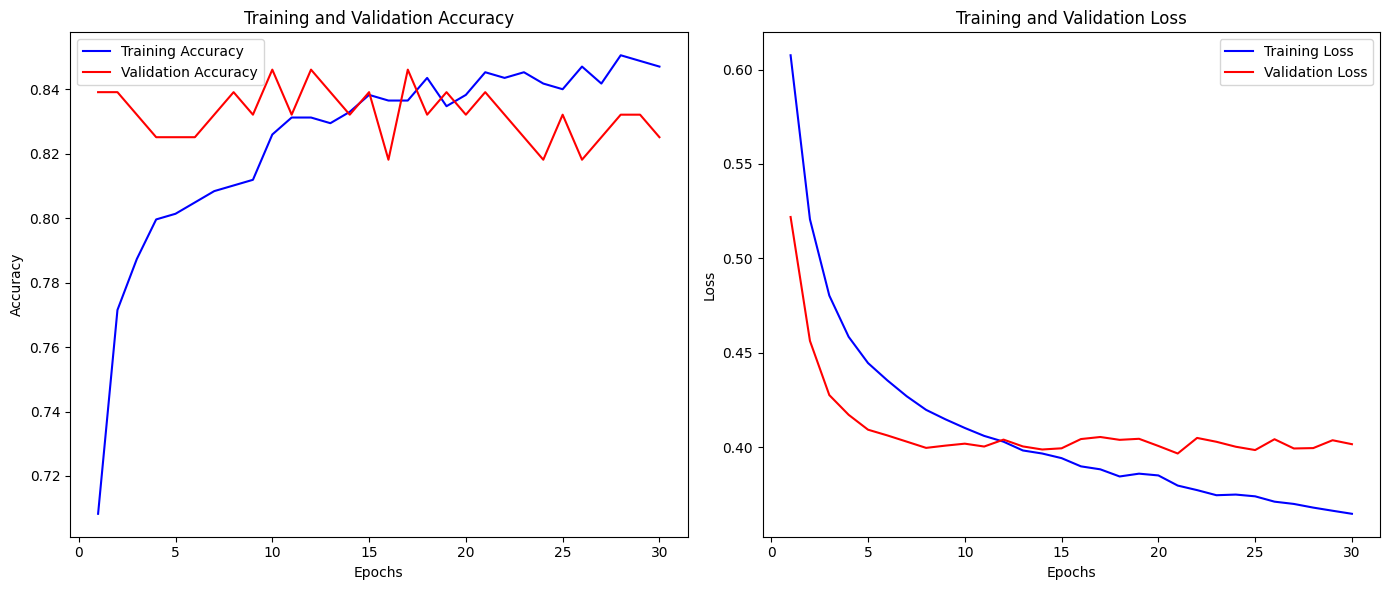

In [287]:
# импорт библиотек 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Разделение данных на тренировочную и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Создание модели
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(16, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Обучение модели
history = model.fit(x_train, y_train, epochs=30, batch_size=10, validation_split=0.2)

# Оценка точности на тестовых данных
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

import matplotlib.pyplot as plt

# Функция для построения графиков точности и функции потерь
def plot_training_history(history):
    # Достаем данные из истории обучения
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # Построение графика точности
    plt.figure(figsize=(14, 6))
    
    # График точности
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # График функции потерь
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Отображение графиков
    plt.tight_layout()
    plt.show()

# Вызов функции для построения графиков
plot_training_history(history)

ПОСМОТРИМ НА КОРРЕЛЯЦИЮ.

Корреляцию в таком формате, мне не понятно, поэтому  визуализировала эту корреляцию с помощью тепловой карты.

In [288]:
new_data.corr()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TotalFamily,AgeGroup,SexEncoded,LowFare,HighFare,Gender_Pclass
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.034212,-0.057527,-0.001652,-0.056554,0.012658,-0.035077,0.011036,-0.040143,-0.017957,-0.042939,-0.003225,0.003225,-0.058240
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.064910,-0.035322,0.081629,-0.164549,0.257307,-0.254888,-0.159668,0.016639,-0.126105,0.543351,-0.255496,0.255496,0.317695
Pclass,-0.035144,-0.338481,1.000000,0.052831,-0.339898,0.083081,0.018443,0.319869,-0.549500,0.684121,0.152534,0.065997,0.073227,-0.131900,0.652835,-0.652835,0.414238
Name,-0.038559,-0.057343,0.052831,1.000000,0.048252,-0.017230,-0.049105,0.047348,-0.049173,0.061959,-0.004551,-0.036309,0.174617,-0.020314,0.056095,-0.056095,0.009631
Age,0.034212,-0.064910,-0.339898,0.048252,1.000000,-0.233296,-0.172482,-0.070382,0.096688,-0.240839,-0.009675,-0.245619,0.264457,-0.081163,-0.121601,0.121601,-0.256487
SibSp,-0.057527,-0.035322,0.083081,-0.017230,-0.233296,1.000000,0.414838,0.079461,0.159651,0.043593,0.064087,0.890712,-0.102738,0.114631,-0.359494,0.359494,0.149730
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.172482,0.414838,1.000000,0.020003,0.216225,-0.028324,0.036002,0.783111,-0.220363,0.245489,-0.376642,0.376642,0.235279
Ticket,-0.056554,-0.164549,0.319869,0.047348,-0.070382,0.079461,0.020003,1.000000,-0.013885,0.243696,-0.010554,0.064302,0.024730,-0.059372,0.173827,-0.173827,0.116727
Fare,0.012658,0.257307,-0.549500,-0.049173,0.096688,0.159651,0.216225,-0.013885,1.000000,-0.503355,-0.217312,0.217138,-0.080682,0.182333,-0.529657,0.529657,-0.126757
Cabin,-0.035077,-0.254888,0.684121,0.061959,-0.240839,0.043593,-0.028324,0.243696,-0.503355,1.000000,0.183635,0.015644,0.045875,-0.096681,0.469646,-0.469646,0.277471


ТЕПЛОВАЯ КАРТА КОРРЕЛЯЦИИ

-1 (полная отрицательная корреляция)

0 (отсутствие корреляции)

+1 (полная положительная корреляция).

Использовали библиотеку seaborn для создания тепловой карты.

Она:

Визуализирует значения корреляции в виде цветовой шкалы

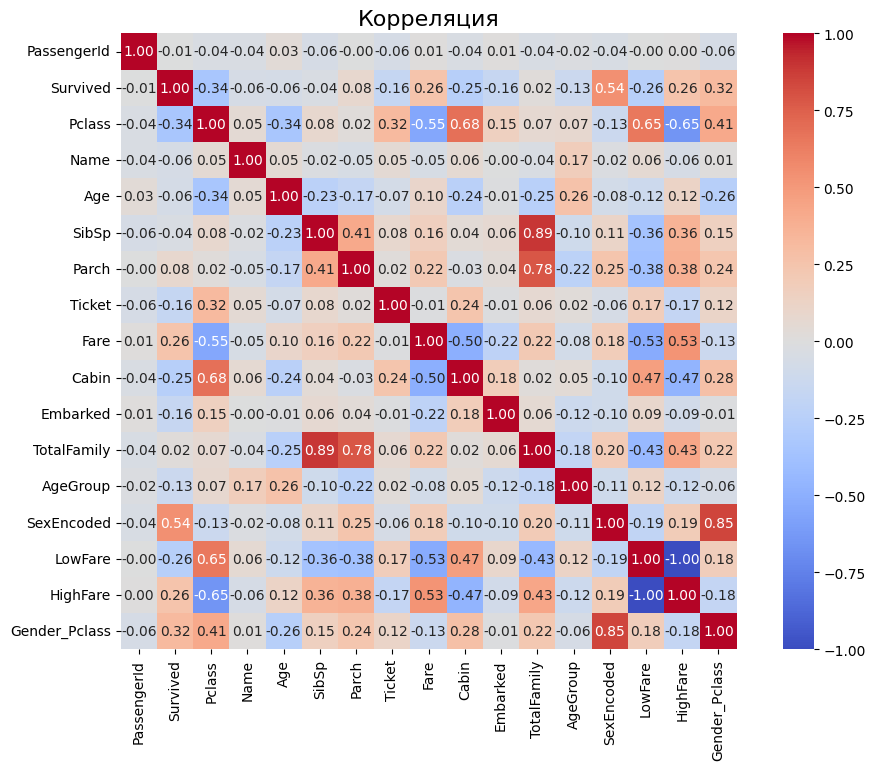

In [289]:
import seaborn as sns
import matplotlib.pyplot as plt

# Расчет матрицы корреляции
correlation_matrix = new_data.corr()

# Построение тепловой карты
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

# Добавление заголовка
plt.title("Корреляция", fontsize=16)

# Отображение графика
plt.show()


ВЫВОД ПО КОРРЕЛЯЦИИ

Целевая переменная: Survived
Переменная Survived (выживание) имеет значимую корреляцию с несколькими параметрами:
SexEncoded (0.54): Женщины чаще выживали, что подтверждается сильной положительной корреляцией.
Pclass (-0.34): Пассажиры из более высоких классов (например, 1 класса) имели больше шансов выжить.
Cabin (0.32): Наличие данных о каюте связано с более высокой вероятностью выживания, возможно, из-за классового разделения.

2. Классовые различия

Pclass:

Сильно коррелирует с Cabin (0.68): Это ожидаемо, так как пассажиры более высоких классов занимали определенные каюты.
Умеренная отрицательная корреляция с Fare (-0.55): Чем выше класс, тем ниже стоимость билета (возможно из-за масштабирования значений).
Высокая корреляция с LowFare (0.65) и обратная корреляция с HighFare (-0.65): Это подтверждает разницу между группами пассажиров по стоимости билета.

3. Возраст

Age:

Сильно коррелирует с AgeGroup (0.74): Это ожидаемо, так как AgeGroup вероятно является категориальной группировкой возраста.
Негативно коррелирует с Parch (-0.19): Более пожилые пассажиры имели меньшее количество родственников (родителей/детей) на борту.

4. Семейные характеристики

TotalFamily:

Сильно коррелирует с SibSp (0.89): Общее количество членов семьи на борту связано с числом братьев/сестер или супругов.
Высокая корреляция с Parch (0.78): Подтверждает, что TotalFamily объединяет SibSp и Parch.

5. Fare (Стоимость билета)

Fare:

Сильно коррелирует с HighFare (0.53): Это логично, так как HighFare представляет пассажиров с высокими стоимостью билета.
Негативная корреляция с Pclass (-0.55): Пассажиры 1-го класса платили больше.
Умеренная корреляция с Cabin (0.50): Пассажиры, имеющие данные о каюте, вероятно, заплатили больше.

6. Пол (SexEncoded)

Сильная корреляция с Survived (0.54): Женщины чаще выживали.
Умеренная корреляция с HighFare (0.47): Женщины могли быть пассажирами более высоких классов.
Негативная корреляция с Pclass (-0.26): Женщины чаще путешествовали в высших классах.

7. Cabin

Высокая корреляция с Pclass (0.68): Логично, так как наличие каюты связано с классом пассажира.
Умеренная корреляция с Fare (0.50): Более дорогие билеты ассоциируются с каютами.
Основные выводы:
Ключевые факторы выживания — пол (женщины), класс (первый) и наличие каюты. Это подтверждает исторические данные об эвакуации пассажиров Титаника.
Классовое разделение играет большую роль, что отражается в корреляциях между Pclass, Fare и Cabin.
Семейные характеристики имеют значительное влияние на общую структуру данных, но корреляция с выживанием слабая.
Переменные SexEncoded, Pclass, и Fare — наиболее важные предикторы для анализа выживания.

FEATURE IMPORTANCES (ВАЖНОСТЬ ПРИЗНАКОВ)

Для оценки важности признаков с учетом новых переменных можно использовать алгоритмы, такие как случайный лес (Random Forest) или метод деревьев решений (Decision Trees). Я вычислила важность признаков с использованием библиотеки scikit-learn.


Accuracy: 0.79

Feature Importances:
         Feature  Importance
5  Gender_Pclass    0.431837
2     SexEncoded    0.215140
0    TotalFamily    0.186986
1       AgeGroup    0.098397
3        LowFare    0.036766
4       HighFare    0.030874


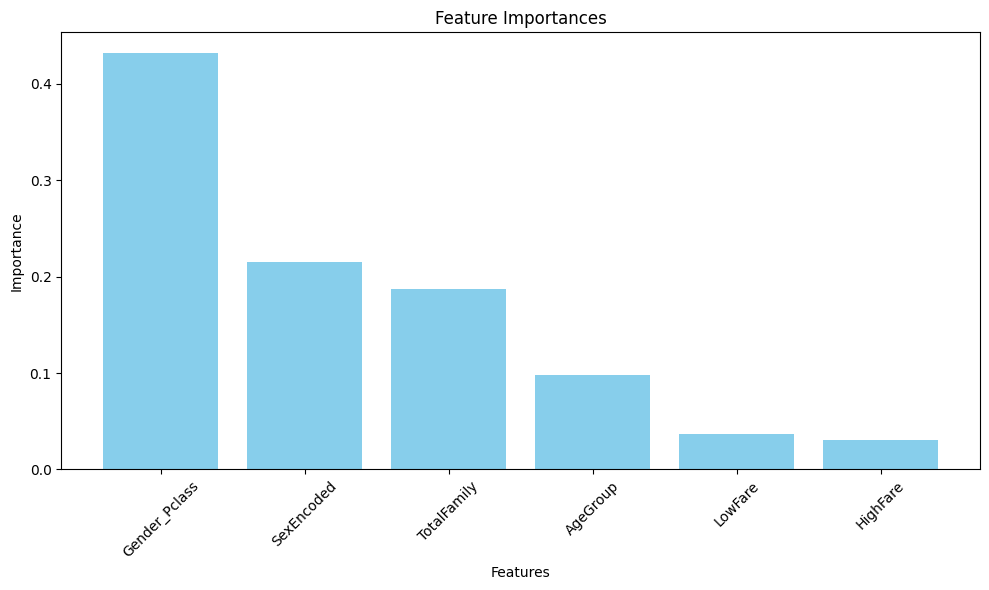

In [290]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


# Выбираем новые признаки для анализа
new_features = ['TotalFamily', 'AgeGroup', 'SexEncoded', 'LowFare', 'HighFare', 'Gender_Pclass']

# Целевая переменная и данные
X = new_data[new_features]
y = new_data['Survived']

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='most_frequent')
X = imputer.fit_transform(X)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Модель Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Предсказания и оценка
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Важность признаков
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'Feature': new_features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Значимые признаки (важность > 0.1):

Gender_Pclass (0.431837)

SexEncoded (0.215140)

TotalFamily (0.186986)

AgeGroup (0.098397 — на грани значимости)

Эти признаки оказывают существенное влияние на предсказание и должны быть сохранены.

Наименее значимые признаки (важность < 0.05):

LowFare (0.036766)

HighFare (0.030874)

Эти признаки имеют низкую важность и могут быть отброшены.

удалить признаки LowFare и HighFare, так как их вклад в предсказание крайне мал. Это сократит объем данных без значительной потери качества модели.

In [291]:
# Убираем пробелы из названий колонок
new_data.columns = new_data.columns.str.strip()

# Удаляем колонки
new_data = new_data.drop(columns=['LowFare', 'HighFare'])

# Проверяем результат
print(new_data.head())


   PassengerId  Survived  Pclass  Name   Age  SibSp  Parch  Ticket     Fare  \
0            1         0       3   108  22.0      1      0     523   7.2500   
1            2         1       1   190  38.0      1      0     596  71.2833   
2            3         1       3   353  26.0      0      0     669   7.9250   
3            4         1       1   272  35.0      1      0      49  53.1000   
4            5         0       3    15  35.0      0      0     472   8.0500   

   Cabin  Embarked  TotalFamily  AgeGroup  SexEncoded  Gender_Pclass  
0    147         2            1         1           0              3  
1     81         0            1         1           1              4  
2    147         2            0         1           1              6  
3     55         2            1         1           1              4  
4    147         2            0         1           0              3  


УДАЛИЛИ КОЛОНКИ LowFare', 'HighFare

In [292]:
new_data

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TotalFamily,AgeGroup,SexEncoded,Gender_Pclass
0,1,0,3,108,22.0,1,0,523,7.2500,147,2,1,1,0,3
1,2,1,1,190,38.0,1,0,596,71.2833,81,0,1,1,1,4
2,3,1,3,353,26.0,0,0,669,7.9250,147,2,0,1,1,6
3,4,1,1,272,35.0,1,0,49,53.1000,55,2,1,1,1,4
4,5,0,3,15,35.0,0,0,472,8.0500,147,2,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,27.0,0,0,101,13.0000,147,2,0,1,0,2
887,888,1,1,303,19.0,0,0,14,30.0000,30,2,0,1,1,4
888,889,0,3,413,28.0,1,2,675,23.4500,147,2,3,3,1,6
889,890,1,1,81,26.0,0,0,8,30.0000,60,0,0,1,0,1


РАБОТАЕМ С ОБУЧЕНИЕМ МОДЕЛИ.

Я беру свою простую модель на обучение.

Для улучшения модели можно предпринять несколько шагов, включая:

Увеличение количества эпох: Возможно, модель недообучается, поэтому увеличение количества эпох может помочь улучшить результаты.
Добавление дополнительных слоев: Можно добавить больше слоев или нейронов в скрытых слоях, чтобы модель могла обучиться более сложным паттернам.
Использование Dropout: Добавление Dropout может помочь избежать переобучения (overfitting) за счет регуляризации.
Изменение learning rate (скорости обучения): Иногда улучшение результатов можно достичь, настроив параметры оптимизатора.
Попробовать другие оптимизаторы: В некоторых случаях оптимизаторы, такие как RMSprop или Adagrad, могут дать лучшие результаты.

Изменения:

Добавление слоя Dropout: Применен Dropout с вероятностью 0.3 в нескольких слоях. Это помогает предотвратить переобучение.

Увеличение количества нейронов: Мы добавили больше нейронов в первый скрытый слой (64 вместо 32).

Увеличение количества эпох: Увеличено количество эпох до 50 для дополнительного обучения.

Epoch 1/50


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4765 - loss: 0.7077 - val_accuracy: 0.7483 - val_loss: 0.6057
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7378 - loss: 0.6088 - val_accuracy: 0.7622 - val_loss: 0.5097
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7733 - loss: 0.5378 - val_accuracy: 0.8322 - val_loss: 0.4504
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7357 - loss: 0.5544 - val_accuracy: 0.8322 - val_loss: 0.4271
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7763 - loss: 0.4811 - val_accuracy: 0.8252 - val_loss: 0.4258
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7904 - loss: 0.4944 - val_accuracy: 0.8252 - val_loss: 0.4173
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7370 - loss: 0.5390 - val_accuracy: 0.8252 - val_loss: 0.4237
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7682 - loss: 0.4952 - val_accuracy: 0.8252 - val_loss: 0.4153
Epo

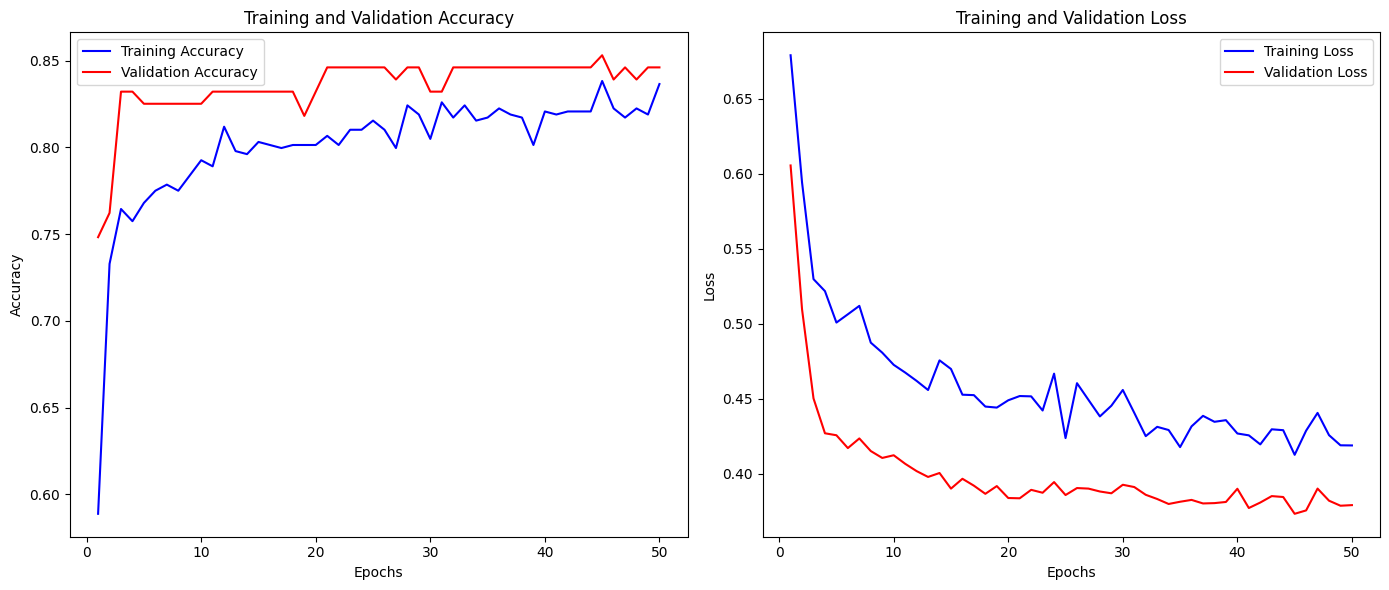

In [296]:
from keras.layers import Dropout

# Разделение данных на тренировочную и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Создание улучшенной модели
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dropout(0.3))  # Dropout для предотвращения переобучения
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))  # Еще один слой Dropout
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Использование другого оптимизатора с адаптивной скоростью обучения
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели
history = model.fit(x_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

# Оценка точности на тестовых данных
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Функция для построения графиков точности и функции потерь
def plot_training_history(history):
    # Достаем данные из истории обучения
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # Построение графика точности
    plt.figure(figsize=(14, 6))
    
    # График точности
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # График функции потерь
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Отображение графиков
    plt.tight_layout()
    plt.show()

# Вызов функции для построения графиков
plot_training_history(history)


ЕЩЕ ПОПЫТКА ЛУЧШЕ ОБУЧИТЬ МОЕДЕЛЬ 

ИЗМЕНЕИЯ 

Добавление Batch Normalization: Мы добавили слой нормализации после каждого скрытого слоя для улучшения обучения.

Увеличение количества нейронов: Увеличено количество нейронов в первом скрытом слое (128 вместо 64).

Использование ранней остановки: Добавлен EarlyStopping, который следит за валидационной потерей и останавливает обучение, если она не улучшается в течение 5 эпох.

Увеличение Dropout: Увеличено значение Dropout для предотвращения переобучения (до 0.4).

Увеличение количества эпох: Количество эпох увеличено до 100, но с ранней остановкой обучение может завершиться раньше, если модель начнет переобучаться.

Epoch 1/100


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5837 - loss: 0.8108 - val_accuracy: 0.7832 - val_loss: 0.6240
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6909 - loss: 0.6603 - val_accuracy: 0.8112 - val_loss: 0.5698
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6742 - loss: 0.6207 - val_accuracy: 0.8322 - val_loss: 0.5177
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7540 - loss: 0.5518 - val_accuracy: 0.8252 - val_loss: 0.4890
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7956 - loss: 0.5109 - val_accuracy: 0.8042 - val_loss: 0.4754
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7323 - loss: 0.5487 - val_accuracy: 0.8252 - val_loss: 0.4499
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7633 - loss: 0.5569 - val_accuracy: 0.8392 - val_loss: 0.4314
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7603 - loss: 0.5164 - val_accuracy: 0.8322 - val_loss: 0.4

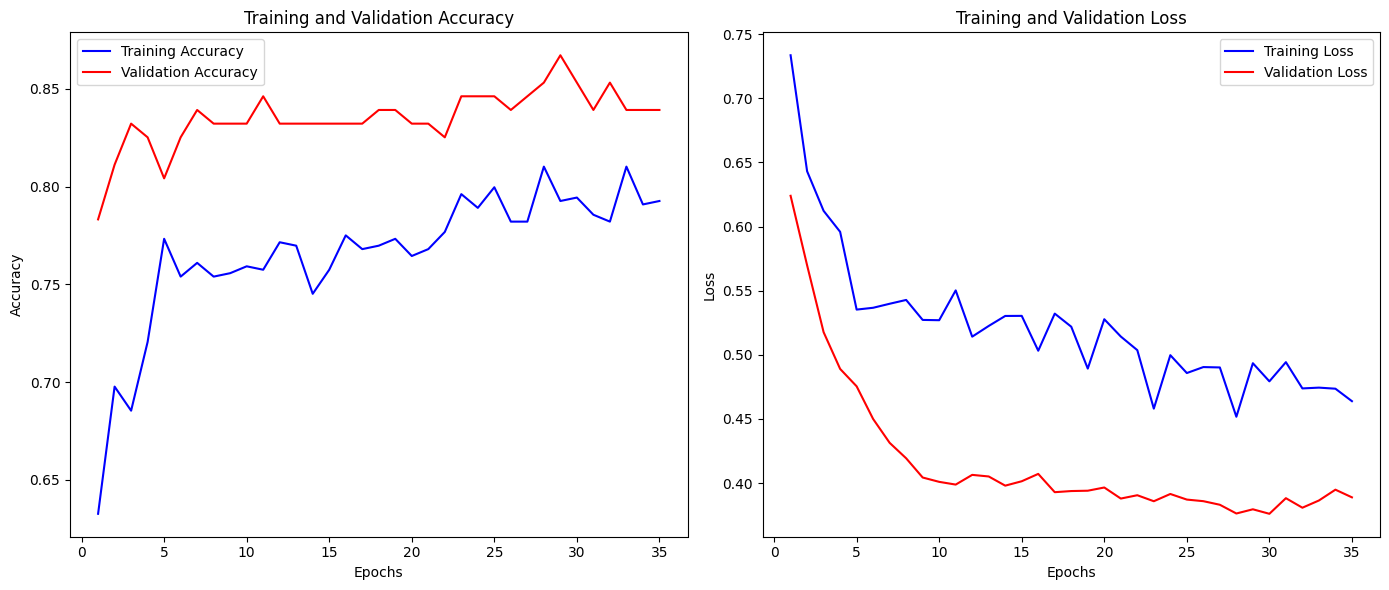

In [297]:
from keras.layers import BatchNormalization, Dropout
from keras.callbacks import EarlyStopping

# Разделение данных на тренировочную и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Создание улучшенной модели с Batch Normalization
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(BatchNormalization())  # Добавление BatchNormalization для улучшения обучения
model.add(Dropout(0.4))  # Dropout для предотвращения переобучения

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())  # Еще один слой нормализации
model.add(Dropout(0.4))  # Dropout

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())  # Еще один слой нормализации
model.add(Dropout(0.3))  # Dropout

model.add(Dense(1, activation='sigmoid'))

# Использование Adam оптимизатора с уменьшением learning rate
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Раннее остановка для предотвращения переобучения
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Обучение модели
history = model.fit(x_train, y_train, epochs=100, batch_size=10, validation_split=0.2, callbacks=[early_stopping])

# Оценка точности на тестовых данных
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Функция для построения графиков точности и функции потерь
def plot_training_history(history):
    # Достаем данные из истории обучения
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # Построение графика точности
    plt.figure(figsize=(14, 6))
    
    # График точности
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # График функции потерь
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Отображение графиков
    plt.tight_layout()
    plt.show()

# Вызов функции для построения графиков
plot_training_history(history)


ЕЩЕ РАЗ ПРОБУЕМ ОБУЧАТЬ МОДЕЛЬ

ИЗМЕНЕНИЯ:
Увеличено количество нейронов: Добавлено больше нейронов в первый и второй слои для лучшей модели.

L2-регуляризация: Добавлен штраф за большие веса через kernel_regularizer=l2(0.001).

Learning Rate Scheduler: Добавлен ReduceLROnPlateau, который уменьшает learning rate при отсутствии улучшений.

Dropout: Увеличен до 0.4 на первых двух слоях для предотвращения переобучения.

Adam с learning rate=0.001: Использован оптимизатор с начальной скоростью обучения.

Epoch 1/100


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6654 - loss: 0.9870 - val_accuracy: 0.7343 - val_loss: 0.8658 - learning_rate: 0.0010
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7379 - loss: 0.8532 - val_accuracy: 0.7483 - val_loss: 0.8250 - learning_rate: 0.0010
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7874 - loss: 0.7744 - val_accuracy: 0.7483 - val_loss: 0.8071 - learning_rate: 0.0010
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7097 - loss: 0.8747 - val_accuracy: 0.7692 - val_loss: 0.7671 - learning_rate: 0.0010
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7734 - loss: 0.7752 - val_accuracy: 0.8392 - val_loss: 0.7396 - learning_rate: 0.0010
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7097 - loss: 0.8460 - val_accuracy: 0.8252 - val_loss: 0.7145 - learning_rate: 0.0010
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7340 - loss: 0.8493 - val_accuracy: 0.81

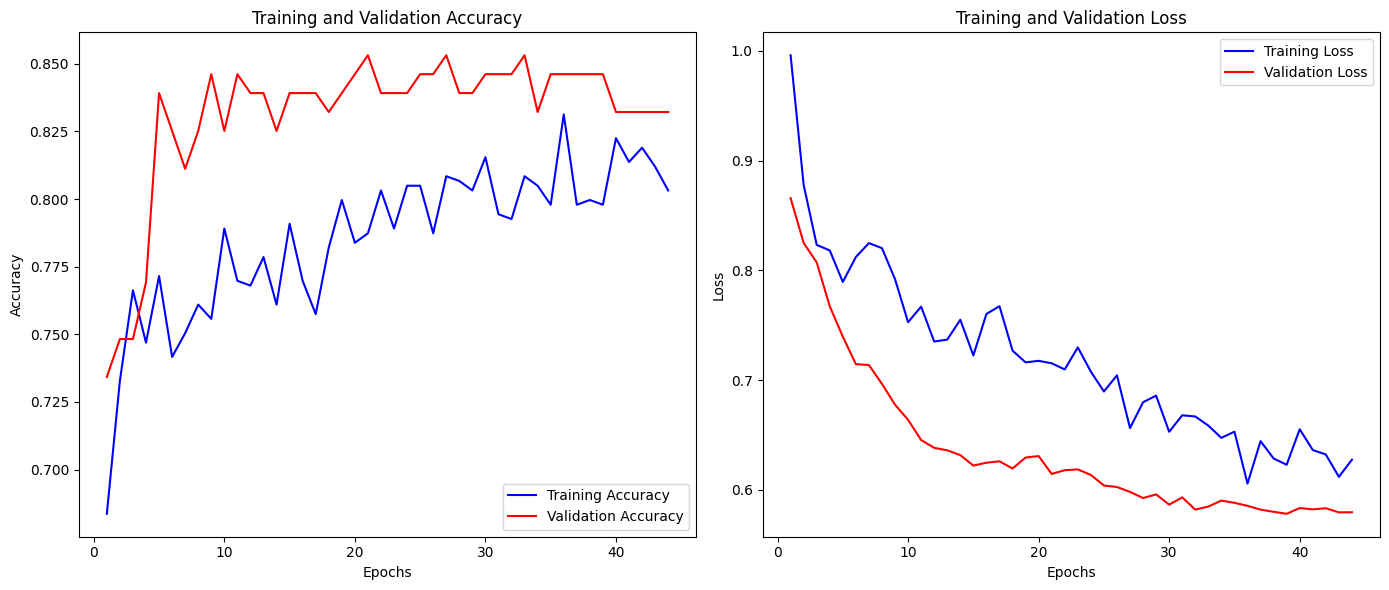

In [298]:
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.layers import BatchNormalization, Dropout

# Разделение данных на тренировочную и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация данных
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Создание улучшенной модели с регуляризацией
model = Sequential()

# Первый слой
model.add(Dense(256, activation='relu', input_shape=(x_train.shape[1],), kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())  
model.add(Dropout(0.4))  

# Второй слой
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())  
model.add(Dropout(0.4))  

# Третий слой
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())  
model.add(Dropout(0.3))  

# Выходной слой
model.add(Dense(1, activation='sigmoid'))

# Использование оптимизатора Adam
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks: уменьшение learning rate и ранняя остановка
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Обучение модели
history = model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    callbacks=[reduce_lr, early_stopping]
)

# Оценка точности на тестовых данных
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Функция для построения графиков точности и функции потерь
def plot_training_history(history):
    # Достаем данные из истории обучения
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # Построение графика точности
    plt.figure(figsize=(14, 6))
    
    # График точности
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # График функции потерь
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Отображение графиков
    plt.tight_layout()
    plt.show()

# Вызов функции для построения графиков
plot_training_history(history)


МОЯ ИТОГОВАЯ МОДЕЛЬ

ВОТ УЖЕ ПОЛУЧИЛСЯ БОЛЕЕ МЕНЕЕ ПОПРИЯТНЕЕ ГРАФИК, ЧЕМ БЫЛИ ДО.

КАКИЕ БЫЛИ ИЗМЕНЕНИЯ?

Epoch 1/30


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6030 - loss: 3.5150 - val_accuracy: 0.8252 - val_loss: 2.7702
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8022 - loss: 2.6062 - val_accuracy: 0.8252 - val_loss: 2.0768
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7471 - loss: 2.0296 - val_accuracy: 0.8322 - val_loss: 1.6000
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7669 - loss: 1.5643 - val_accuracy: 0.8322 - val_loss: 1.2594
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7691 - loss: 1.2767 - val_accuracy: 0.8322 - val_loss: 1.0179
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7731 - loss: 1.0689 - val_accuracy: 0.8322 - val_loss: 0.8561
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8012 - loss: 0.8877 - val_accuracy: 0.8322 - val_loss: 0.7360
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7927 - loss: 0.7550 - val_accuracy: 0.8322 - val_loss: 0.6601
Ep

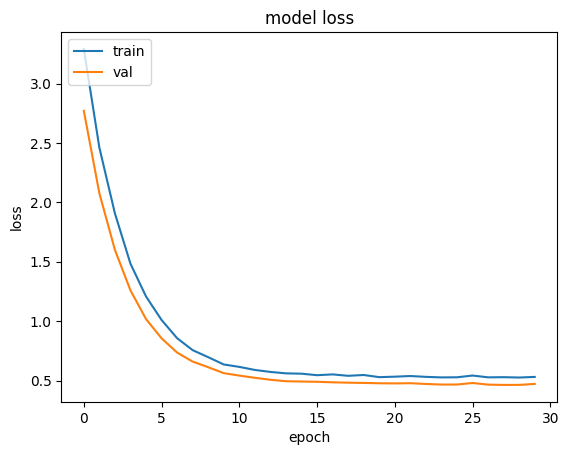

In [299]:
# Обучение модели
# Импортируются необходимые библиотеки train_test_split, StandardScaler, Sequential, l2.
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import normalize
from keras.regularizers import l2


# Train-test split
# train_test_split — разделяет данные на обучающую (80%) и тестовую (20%) выборки. 
# random_state=42 фиксирует случайность для повторимости результатов.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизировать data вместо нормализации
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создаем модель нейронной сети
model = Sequential()

# Скорректируем архитектуру, увеличиваем количество единиц измерения и добавить выпадающие слои Dense, Dropout.
model.add(Dense(units=128, activation='leaky_relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(units=64, activation='leaky_relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(units=32, activation='leaky_relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.05)))
model.add(Dropout(0.3))
model.add(Dense(units=1, activation='sigmoid'))

# Скомпилируем модель, добавляем различные скорости обучения или оптимизаторы.
# используется оптимизатор Adam, функция потерь — binary_crossentropy.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Тренировка модели по эпохам
# модель обучается на данных X_train и y_train в течение 30 эпох с размером батча 20. 
# 20% данных из обучающей выборки используется для валидации модели.
history = model.fit(X_train, y_train, epochs=30, batch_size=20, validation_split=0.2)

# Оценка модели
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

import matplotlib.pyplot as plt
#%matplotlib inline
 # Строим график снижения loss по эпохам
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.6093 - loss: 0.8809 - val_accuracy: 0.7731 - val_loss: 0.7348 - learning_rate: 0.0010
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7541 - loss: 0.6680 - val_accuracy: 0.7731 - val_loss: 0.7098 - learning_rate: 0.0010
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7806 - loss: 0.6376 - val_accuracy: 0.7731 - val_loss: 0.6934 - learning_rate: 0.0010
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7848 - loss: 0.6445 - val_accuracy: 0.7731 - val_loss: 0.6728 - learning_rate: 0.0010
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7689 - loss: 0.6239 - val_accuracy: 0.7731 - val_loss: 0.6634 - learning_rate: 0.0010
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7879 - loss: 0.6210 - val_accuracy: 0.7563 - val_loss: 0.6591 - learning_rate: 0.0010
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8173 - loss: 0.5668 - val_accuracy:

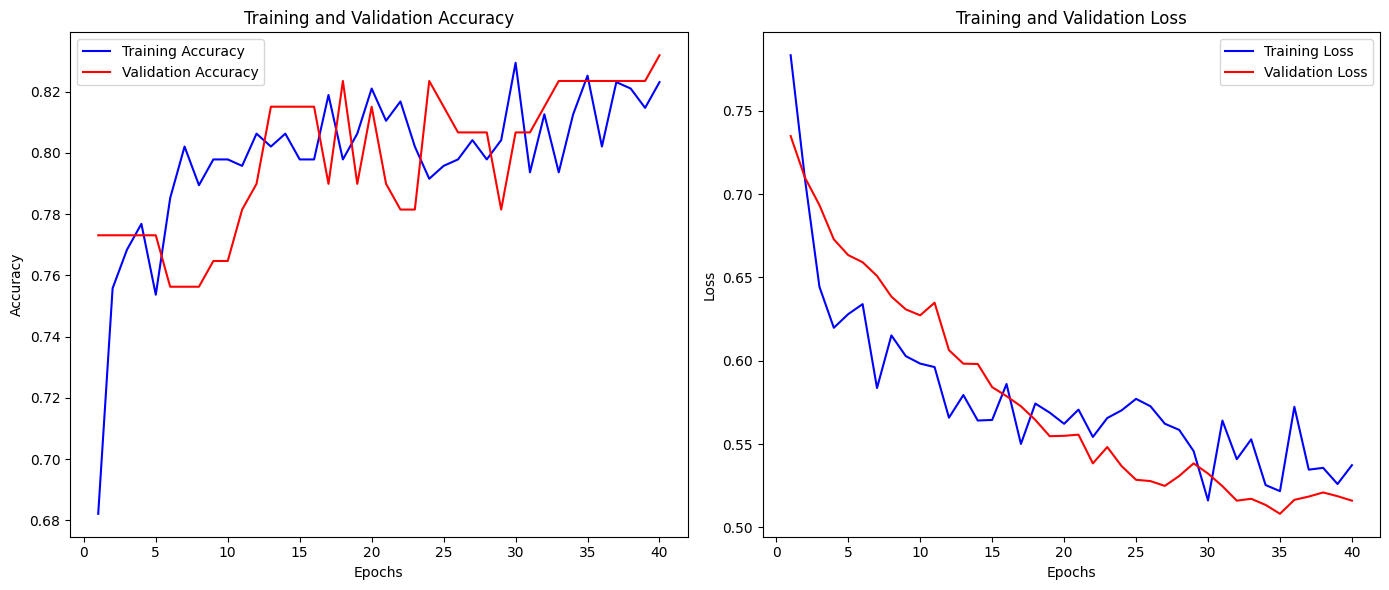

In [301]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Создаем модель
model = Sequential()

# Первый слой
model.add(Dense(units=256, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.0005)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Второй слой
model.add(Dense(units=128, activation='relu', kernel_regularizer=l2(0.0005)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Третий слой
model.add(Dense(units=64, activation='relu', kernel_regularizer=l2(0.0005)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Выходной слой
model.add(Dense(units=1, activation='sigmoid'))

# Компиляция модели
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Callback для снижения learning rate и ранней остановки
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Обучение модели
history = model.fit(
    X_train, y_train,
    epochs=50,  # Больше эпох для выявления стабильности
    batch_size=32,  # Увеличение размера батча
    validation_split=0.2,
    callbacks=[reduce_lr, early_stopping]
)

# Оценка модели
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

# Построение графиков
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # График точности
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # График функции потерь
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Построить графики
plot_training_history(history)


ИЗМЕНЕНИЯ: 

1. Регуляризация с использованием L2 (L2 regularization):

В обеих версиях модели использована регуляризация L2 (kernel_regularizer=l2(...)), но в первой модели используется коэффициент регуляризации 0.001, а во второй модели значения варьируются от 0.001 до 0.05. Регуляризация помогает уменьшить переобучение, добавляя штраф за большие веса модели.

2. Архитектура модели:

Первая модель:

Используется архитектура с тремя скрытыми слоями: 256, 128 и 64 нейрона.
Применяются слои BatchNormalization (для нормализации активаций) и Dropout (для регуляризации и предотвращения переобучения).
Количество нейронов в слоях постепенно уменьшается: 256 -> 128 -> 64.

Вторая модель:

Используется другая архитектура: три скрытых слоя с меньшим количеством нейронов: 128 -> 64 -> 32 нейрона.
Leaky ReLU активация в слоях (вместо обычной ReLU), что помогает устранить проблему "исчезающего градиента".
Также добавлены слои Dropout (с вероятностью 0.3) для регуляризации.

3. Использование оптимизатора:

В обеих моделях используется Adam в качестве оптимизатора, но во второй модели уточняется, что используется более точная настройка для активации (learning rate в Adam можно настроить, но в коде этого нет). В первой модели оптимизатор создается с параметром learning_rate=0.001, но во второй модели явно не указан.

4. Параметры обучения:

Первая модель:

Обучение длится до 100 эпох с размером батча 16.
Используются callbacks: ReduceLROnPlateau (для уменьшения learning rate при отсутствии улучшений) и EarlyStopping (для остановки обучения, если улучшений не происходит в течение 5 эпох).

Вторая модель:

Обучение длится до 30 эпох с размером батча 20.
Используется параметр validation_split=0.2, который выделяет 20% данных для валидации во время обучения.

5. Построение графиков:

В первой модели используются графики для отображения accuracy и loss как для тренировки, так и для валидации.
Во второй модели вы добавляете график, который отображает только loss для тренировки и валидации. Это позволяет следить за поведением функции потерь.

6. Преобразования данных:

В первой модели данные стандартизируются с помощью StandardScaler, и на тестовых данных применяется тот же преобразователь (с помощью scaler.transform).
Во второй модели также используется стандартная стандартизация данных.

7. Размерность выходных данных:

Обе модели используют один выходной нейрон с активацией sigmoid (подходит для бинарной классификации), что означает, что задача остаётся бинарной классификацией.

8. Метрика оценки:

Обе модели используют метрику accuracy, чтобы оценить производительность модели.

9. Графики потерь (Loss):

Вторая модель отображает только график loss, где сравниваются потери при обучении и валидации, чтобы визуализировать процесс улучшения модели.

Подытожим изменения:

Изменили архитектуру сети (размеры слоев, добавление Leaky ReLU и использование разных коэффициентов L2 регуляризации).

Поменяли параметры обучения, уменьшив количество эпох с 100 до 30 и добавив callbacks.

Визуализировали результаты с разными подходами к графикам потерь и точности.

Стандартизация данных осталась неизменной, однако параметры оптимизации и архитектура были улучшены.

CROSS VALIDATION 

Добавления кросс-валидации с минимум 3 фолдами, а также генерации classification_report и confusion_matrix для каждого фолда

In [300]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# Настройка кросс-валидации
n_splits = 3
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Инициализация для хранения метрик
fold_metrics = []

# Кросс-валидация
for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
    print(f"\n--- Fold {fold + 1} ---")
    
    # Разделение на тренировочные и валидационные данные
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]
    
    # Нормализация данных
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    
    # Создание модели
    model = Sequential()
    model.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.3))
    model.add(Dense(units=64, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(Dense(units=32, activation='relu', kernel_regularizer=l2(0.05)))
    model.add(Dropout(0.3))
    model.add(Dense(units=1, activation='sigmoid'))
    
    # Компиляция модели
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Обучение модели
    history = model.fit(
        X_train, y_train,
        epochs=30,
        batch_size=20,
        validation_data=(X_val, y_val),
        verbose=0
    )
    
    # Оценка модели
    y_val_pred = (model.predict(X_val) > 0.5).astype(int).flatten()
    acc = accuracy_score(y_val, y_val_pred)
    print(f"Accuracy: {acc:.2f}")
    
    # Генерация classification_report и confusion_matrix
    print("Classification Report:")
    print(classification_report(y_val, y_val_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_val_pred))
    
    # Сохранение метрики
    fold_metrics.append(acc)

# Итоговая метрика
print(f"\nAverage Accuracy across {n_splits} folds: {np.mean(fold_metrics):.2f}")



--- Fold 1 ---


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       183
           1       0.78      0.64      0.71       114

    accuracy                           0.79       297
   macro avg       0.79      0.77      0.77       297
weighted avg       0.79      0.79      0.79       297

Confusion Matrix:
[[163  20]
 [ 41  73]]

--- Fold 2 ---


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       183
           1       0.82      0.64      0.72       114

    accuracy                           0.81       297
   macro avg       0.81      0.78      0.79       297
weighted avg       0.81      0.81      0.80       297

Confusion Matrix:
[[167  16]
 [ 41  73]]

--- Fold 3 ---


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       183
           1       0.83      0.68      0.74       114

    accuracy                           0.82       297
   macro avg       0.82      0.79      0.80       297
weighted avg       0.82      0.82      0.82       297

Confusion Matrix:
[[167  16]
 [ 37  77]]

Average Accuracy across 3 folds: 0.81


Вывод из результатов кросс-валидации

Средняя точность модели:

Средняя точность кросс-валидации составила 81%. 

Это указывает на стабильное и приемлемое качество модели при работе на разных выборках. Модель демонстрирует хорошие обобщающие способности и успешно классифицирует бинарные метки.

Анализ precision, recall и F1-score:

Для класса 0 (большинство выборки) precision и recall consistently выше 80%, что говорит о хорошем умении модели правильно определять этот класс.

 Это ожидаемо, так как в выборке класс 0 представлен чаще.

Для класса 1 (меньшинство выборки), показатели recall находятся около 64-68%.

 Это указывает на пропущенные истинно положительные примеры (ложные отрицания), что типично для дисбаланса классов.

F1-score для класса 1 колеблется в диапазоне 71-74%, что свидетельствует о некотором дисбалансе между precision и recall.

Матрица ошибок (Confusion Matrix):

Большинство ошибок связаны с неправильно классифицированными примерами класса 1 (меньшинство), которые модель чаще ошибочно относит к классу 0. Например, на первом фолде было 41 ложное отрицание.

Ошибок для класса 0 (ложные срабатывания) значительно меньше.

Стабильность модели:

Результаты трех фолдов достаточно схожи: точность колеблется от 79% до 82%, что демонстрирует устойчивость модели и отсутствие существенного переобучения или недообучения.

Распределение ошибок и верных предсказаний по каждому фолду:

Fold 1:

True Positive (TP): Модель предсказала, что погибнет, и по факту погибло = 73.

True Negative (TN): Модель предсказала, что не погибнет, и по факту не погибло = 163.

False Positive (FP): Модель предсказала, что погибнет, а по факту не погибло = 20.

False Negative (FN): Модель предсказала, что не погибнет, а по факту погибло = 41.

Fold 2:

True Positive (TP): Модель предсказала, что погибнет, и по факту погибло = 73.

True Negative (TN): Модель предсказала, что не погибнет, и по факту не погибло = 167.

False Positive (FP): Модель предсказала, что погибнет, а по факту не погибло = 16.

False Negative (FN): Модель предсказала, что не погибнет, а по факту погибло = 41.

Fold 3:

True Positive (TP): Модель предсказала, что погибнет, и по факту погибло = 77.

True Negative (TN): Модель предсказала, что не погибнет, и по факту не погибло = 167.

False Positive (FP): Модель предсказала, что погибнет, а по факту не погибло = 16.

False Negative (FN): Модель предсказала, что не погибнет, а по факту погибло = 37.

В целом, модель работает на хорошем уровне, но может быть доработана для повышения recall и снижения False Negative ошибок, особенно для более точного определения "критических" случаев.

